In [3]:
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
DATA_DIR = Path("../data/train")
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.4, 1.6],  
    validation_split=0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 56251 images belonging to 38 classes.
Found 14044 images belonging to 38 classes.


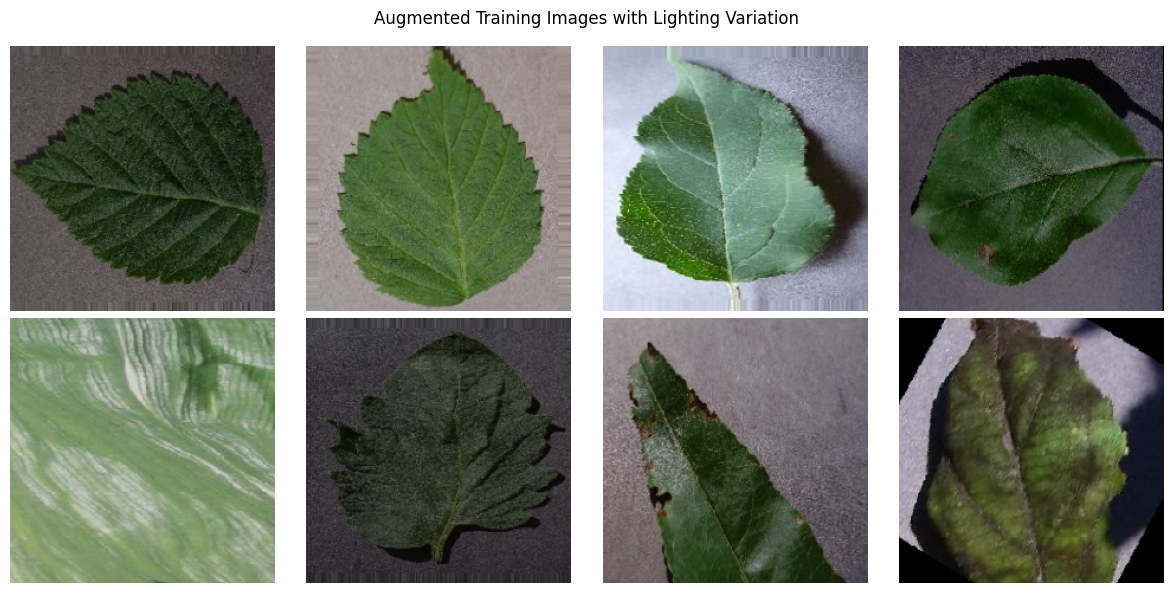

In [ ]:
images, labels = next(train_generator)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.suptitle("Augmented Training Images with Lighting Variation")
plt.tight_layout()
plt.savefig("../data_exploration/augmented_sample_images.png")
plt.show()

In [9]:
import json
class_indices = train_generator.class_indices
with open("../data/class_indices.json", "w") as f:
    json.dump(class_indices, f)

print("✅ Preprocessing complete. Data is ready for model training.")


✅ Preprocessing complete. Data is ready for model training.
